# 建立簡單模型

In [ ]:
import tensorflow as tf

X = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
y = tf.constant([[10.0], [20.0]])


class Linear(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense = tf.keras.layers.Dense(
            units=1,
            activation=None,
            kernel_initializer=tf.zeros_initializer(),
            bias_initializer=tf.zeros_initializer()
        )

    def call(self, input):
        output = self.dense(input)
        return output


# 以下代码结构与前节类似
model = Linear()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
for i in range(100):
    with tf.GradientTape() as tape:
        y_pred = model(X)      # 调用模型 y_pred = model(X) 而不是显式写出 y_pred = a * X + b
        loss = tf.reduce_mean(tf.square(y_pred - y))
    grads = tape.gradient(loss, model.variables)    # 使用 model.variables 这一属性直接获得模型中的所有变量
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
print(model.variables)

## MNIST 使用
MNIST is a computer vision dataset. It consists of black and white images from zero to nine. Each image is 28 * 28. Also, it includes labels for each image, telling us which digit it is.

![Alt text](./images/dnn_implement/Selection_017.png)
![Alt text](./images/dnn_implement/Selection_018.png)


In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(y_train)

(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]


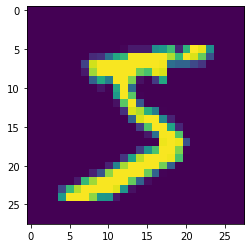

In [2]:
plt.figure()
plt.imshow(x_train[0])

plt.show()

In [3]:
x_train = x_train.reshape([x_train.shape[0], 28*28])
x_test = x_test.reshape([x_test.shape[0], 28*28])
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

x_train shape: (60000, 784)
x_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


# TensorFlow2不同創建模型的方法  
ref:　https://towardsdatascience.com/3-ways-to-build-neural-networks-in-tensorflow-with-the-keras-api-80e92d3b5b7e

![title](images/diff_method.png)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.reset_default_graph()

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(y_train)

model = keras.Sequential([ 
          layers.Flatten(input_shape=(28, 28)), 
          layers.Dense(256,'relu'), 
          layers.Dense(10, "softmax"),
          ])
model.summary()

(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.reset_default_graph()

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(y_train)


inputs = keras.Input(shape=(28, 28)) 
x = layers.Flatten()(inputs) 
x = layers.Dense(256, "relu")(x) 
outputs = layers.Dense(10, "softmax")(x) 

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [15]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.reset_default_graph()

class CustomModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.layer_1 = tf.keras.layers.Flatten()
        self.layer_2 = tf.keras.layers.Dense(256, "relu")
        self.layer_3 = tf.keras.layers.Dense(10, "softmax")
    def call(self, inputs):
        x = self.layer_1(inputs)
        x = self.layer_2(x)
        x = self.layer_3(x)
        return x

model = CustomModel()
model.build((None, 28, 28))
model.summary()

Model: "custom_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# 建立DNN網路模型

In [17]:
import numpy as np
from tensorflow import keras
import tensorflow as tf

class MNISTLoader():
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.train_data, self.train_label), (self.test_data, self.test_label) = mnist.load_data()
        # MNIST中的图像默认为uint8（0-255的数字）。以下代码将其归一化到0-1之间的浮点数，并在最后增加一维作为颜色通道
        self.train_data = np.expand_dims(self.train_data.astype(np.float32) / 255.0, axis=-1)      # [60000, 28, 28, 1]
        self.test_data = np.expand_dims(self.test_data.astype(np.float32) / 255.0, axis=-1)        # [10000, 28, 28, 1]
        self.train_label = self.train_label.astype(np.int32)    # [60000]
        self.test_label = self.test_label.astype(np.int32)      # [10000]
        self.num_train_data, self.num_test_data = self.train_data.shape[0], self.test_data.shape[0]

    def get_batch(self, batch_size):
        # 从数据集中随机取出batch_size个元素并返回
        index = np.random.randint(0, self.num_train_data, batch_size)
        return self.train_data[index, :], self.train_label[index]
    
class MLP(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()    # Flatten层将除第一维（batch_size）以外的维度展平
        self.dense1 = tf.keras.layers.Dense(units=100, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(units=10)

    def call(self, inputs):         # [batch_size, 28, 28, 1]
        x = self.flatten(inputs)    # [batch_size, 784]
        x = self.dense1(x)          # [batch_size, 100]
        x = self.dense2(x)          # [batch_size, 10]
        output = tf.nn.softmax(x)
        return output

batch_size = 5

data_loader = MNISTLoader()
model = MLP()

X, y = data_loader.get_batch(batch_size)
with tf.GradientTape() as tape:
    y_pred = model(X)
    print(y_pred)
    print(y_pred.shape)
    
print(model.dense1.weights[0])
print(model.dense1.weights[1])

tf.Tensor(
[[0.064194   0.06969927 0.08183091 0.14990044 0.0521117  0.08161674
  0.12613367 0.05448687 0.18003437 0.13999207]
 [0.05232222 0.09827985 0.089789   0.1036803  0.08163734 0.11537677
  0.07067029 0.09406292 0.13764086 0.15654048]
 [0.0558522  0.10084508 0.05988157 0.15259908 0.07196806 0.08857309
  0.06818987 0.11720056 0.11984808 0.16504236]
 [0.06275737 0.0761898  0.0729001  0.19949707 0.08316137 0.11138348
  0.11872417 0.09990539 0.08868907 0.08679219]
 [0.06247715 0.09697433 0.09776607 0.2056119  0.03451797 0.06931844
  0.10071731 0.08104109 0.09493541 0.15664028]], shape=(5, 10), dtype=float32)
(5, 10)
<tf.Variable 'mlp_7/dense_18/kernel:0' shape=(784, 100) dtype=float32, numpy=
array([[ 0.03886609, -0.02212188,  0.0120667 , ..., -0.05289493,
        -0.01421787, -0.01816226],
       [ 0.03099182,  0.04225667, -0.06907973, ..., -0.03027409,
        -0.03547848,  0.04153584],
       [-0.04196382,  0.03164756, -0.03685051, ...,  0.02214659,
        -0.01926752,  0.0726730

# 建立DNN網路模型(keras方法1)

In [5]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
tf.compat.v1.reset_default_graph()

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


#initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1., seed=1)
initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=1)

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
#    layers.Dense(64, activation='relu', kernel_initializer=initializer, bias_initializer=initializer),
    layers.Dense(10, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [6]:
print('print layer1 weights:')
print(model.layers[0].weights[0].shape)
print(model.layers[0].weights[0])
print('print layer1 bias:')
print(model.layers[0].weights[1].shape)
print(model.layers[0].weights[1])



print layer1 weights:
(784, 32)
<tf.Variable 'dense/kernel:0' shape=(784, 32) dtype=float32, numpy=
array([[-0.06780564, -0.00386304,  0.0389624 , ...,  0.00437261,
        -0.03026127, -0.04399278],
       [ 0.07763416, -0.07484833,  0.02568665, ..., -0.00981114,
         0.05053391, -0.05618179],
       [ 0.06403153,  0.0056959 , -0.05721907, ..., -0.02562017,
         0.03168775,  0.00487877],
       ...,
       [ 0.08094526,  0.04125176, -0.02574093, ..., -0.01442287,
         0.05915882,  0.06596621],
       [ 0.00098257, -0.07378253, -0.06140096, ..., -0.03154601,
         0.03358915,  0.04278886],
       [ 0.04433479,  0.05901725,  0.01258279, ..., -0.0037417 ,
        -0.03884922,  0.03672508]], dtype=float32)>
print layer1 bias:
(32,)
<tf.Variable 'dense/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>


# 建立DNN網路模型(keras方法2)

In [13]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
tf.compat.v1.reset_default_graph()

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________
